#### `By : Mohamed Ahmed Saad Abohassan`

In [83]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 42

In [84]:
### sorry about the warnings i was trying to solve it

In [85]:
input=np.array([
                [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]

])
labels=np.array([
                [0],
                [1],
                [1],
                [0]
])

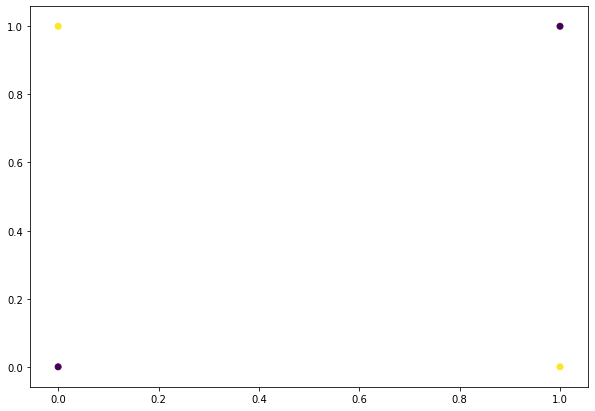

In [86]:
plt.figure(figsize=(10,7))
plt.scatter(input[:,0], input[:,1],c=labels.reshape((4,)));

![picture 1](images/14acdac0d3049962b70e21bc080839d7c3428a9936e45916398920382dd76b46.png)  


#### simple ANN

In [87]:
class ANN ():
    def __init__(self,max_itr,lr):
        self.max_itr=max_itr
        self.lr=lr
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
        
    def sigmoid_der(self,x):
        return self.sigmoid(x) *(1-self.sigmoid (x))

    def fit(self,x_data,y_data):
        weights = np.random.rand(x_data.shape[1],1)
        lr = self.lr
        for epoch in range(self.max_itr):
            u=(x_data@weights)
            y=self.sigmoid(u)
            err=y-y_data
            grad=(input.T)@(err*self.sigmoid_der(u))
            weights=weights-(lr*grad)
            
        self.err=err
        self.weights=weights

    def predict(self,data): 
         u=(data@self.weights)
         y=self.sigmoid(u)
         y_pred=np.where( y > 0.5, 1, 0 ) 
         return y_pred 

    def accuracy(self,y_acual,y_predict):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y_acual,y_predict)
        
        
        
        
    

In [88]:
m=ANN(250000,0.5)
m.fit(input,labels)
y_p=m.predict(input)
score=m.accuracy(labels,y_p)
print(f"labels y =  \n {y_p}")
print(f'the  accuracy = {score} ')
print(f'loss = \n {m.err}')


labels y =  
 [[0]
 [0]
 [0]
 [0]]
the  accuracy = 0.5 
loss = 
 [[ 0.5]
 [-0.5]
 [-0.5]
 [ 0.5]]


In [89]:
m.accuracy(labels,y_p)

0.5

### multi layer perceptron, MLP

In [90]:
class MLP():
    def __init__(self,max_itr,lr):
        self.max_itr=max_itr
        self.lr=lr

    def sigmoid(self,x):
         return 1/(1+np.exp(-x))

    def sigmoid_der(self,x):
        return self.sigmoid(x) *(1-self.sigmoid (x))

    def fit(self,x_data,y_data,nn_hidden_num):
        weights_hidden = np.random.rand(len(x_data[0]),nn_hidden_num) 
        weights_out = np.random.rand(nn_hidden_num, 1)
        lr = self.lr

        for epoch in range(self.max_itr):
            
            # feedforward
            u_hidden = x_data @ weights_hidden
            y_hidden = self.sigmoid(u_hidden)
            u_out = y_hidden @ weights_out
            y_out = self.sigmoid(u_out)

            # back1 =======================

            err_out = y_out - y_data
            grad_out = y_hidden.T @ (err_out * self.sigmoid_der(u_out)) 

            # back 2 =======================

            err_hidden=(err_out*self.sigmoid_der(u_out)) @ weights_out.T
            grad_hidden=x_data.T @ ( err_hidden*self.sigmoid_der(u_hidden))


            # Update Weights ================

            weights_hidden = weights_hidden - lr * grad_hidden
            weights_out    = weights_out    - lr * grad_out

        self.err_out=err_out
        self.weights_hidden=weights_hidden
        self.weights_out=weights_out

    def predict(self,data):

        
        u_hidden = data @ self.weights_hidden
        y_hidden = self.sigmoid(u_hidden)

        u_out = y_hidden @ self.weights_out
        y_out = self.sigmoid(u_out)
        y_pred=np.where( y_out > 0.5, 1, 0 ) 
        return y_pred
    
    def accuracy(self,y_acual,y_predict):
        from sklearn.metrics import accuracy_score
        return accuracy_score(labels,y_pred)
        

In [91]:
input=np.array([
                [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]

])
labels=np.array([
                [0],
                [1],
                [1],
                [0]
])

In [92]:
### with 4 nodes

In [93]:
model=MLP(max_itr=40000,lr=0.02)
model.fit(input,labels,4)
y_pred=model.predict(input)
score=model.accuracy(labels,y_pred)
print(f"labels y =  \n {y_pred}")
print(f'the  accuracy = {score} ')
print(f'loss = \n {model.err_out}')


labels y =  
 [[0]
 [1]
 [1]
 [0]]
the  accuracy = 1.0 
loss = 
 [[ 0.02681546]
 [-0.06872293]
 [-0.06814894]
 [ 0.08488742]]


In [94]:
### with 8 nodes

In [95]:
model=MLP(max_itr=40000,lr=0.02)
model.fit(input,labels,8)
y_pred=model.predict(input)
score=model.accuracy(labels,y_pred)
print(f"labels y =  \n {y_pred}")
print(f'the  accuracy = {score} ')
print(f'loss = \n {model.err_out}')


labels y =  
 [[0]
 [1]
 [1]
 [0]]
the  accuracy = 1.0 
loss = 
 [[ 0.05634684]
 [-0.05228111]
 [-0.06800878]
 [ 0.06890094]]


In [96]:
### with 16 nodes

In [97]:
model=MLP(max_itr=40000,lr=0.02)
model.fit(input,labels,16)
y_pred=model.predict(input)
score=model.accuracy(labels,y_pred)
print(f"labels y =  \n {y_pred}")
print(f'the  accuracy = {score} ')
print(f'loss = \n {model.err_out}')


labels y =  
 [[0]
 [1]
 [1]
 [0]]
the  accuracy = 1.0 
loss = 
 [[ 0.04260333]
 [-0.052493  ]
 [-0.05820105]
 [ 0.06448356]]


In [98]:
df=pd.read_csv("D:\extrnal hard\ITI\Deep learning\diabetes.csv")

In [99]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
X_train=df.iloc[:,0:8]
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [103]:
y_train=df[['Outcome']]
y_train

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [104]:
X_train.shape


(768, 8)

### tensorflow keras

#### shallow model 

In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5,input_shape=(8,),activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [144]:
model.compile(optimizer=optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'],)

In [145]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.fit(X_train, y_train, epochs=150,batch_size=32)


Epoch 1/150
491/491 [==============================] - 0s 385us/sample - loss: 29.4780 - acc: 0.3788
Epoch 2/150
491/491 [==============================] - 0s 149us/sample - loss: 24.0704 - acc: 0.4053
Epoch 3/150
491/491 [==============================] - 0s 83us/sample - loss: 19.2658 - acc: 0.4277
Epoch 4/150
491/491 [==============================] - 0s 78us/sample - loss: 15.6380 - acc: 0.4705
Epoch 5/150
491/491 [==============================] - 0s 59us/sample - loss: 12.8299 - acc: 0.4929
Epoch 6/150
491/491 [==============================] - 0s 106us/sample - loss: 10.7175 - acc: 0.5499
Epoch 7/150
491/491 [==============================] - 0s 57us/sample - loss: 9.3417 - acc: 0.5784
Epoch 8/150
491/491 [==============================] - 0s 57us/sample - loss: 8.3736 - acc: 0.5662
Epoch 9/150
491/491 [==============================] - 0s 67us/sample - loss: 7.7495 - acc: 0.5662
Epoch 10/150
491/491 [==============================] - 0s 71us/sample - loss: 7.2742 - acc: 0.5825


#### 2 layers model

In [147]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12,input_shape=(8,),activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [148]:
model.compile(optimizer=optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'],)

In [149]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(X_train, y_train, epochs=150,batch_size=32)


Epoch 1/150
491/491 [==============================] - 0s 462us/sample - loss: 14.1367 - acc: 0.4379
Epoch 2/150
491/491 [==============================] - 0s 63us/sample - loss: 7.4389 - acc: 0.4521
Epoch 3/150
491/491 [==============================] - 0s 85us/sample - loss: 3.4665 - acc: 0.5866
Epoch 4/150
491/491 [==============================] - 0s 61us/sample - loss: 2.5334 - acc: 0.5255
Epoch 5/150
491/491 [==============================] - 0s 60us/sample - loss: 1.8575 - acc: 0.5336
Epoch 6/150
491/491 [==============================] - 0s 73us/sample - loss: 1.5943 - acc: 0.5580
Epoch 7/150
491/491 [==============================] - 0s 79us/sample - loss: 1.4658 - acc: 0.5540
Epoch 8/150
491/491 [==============================] - 0s 79us/sample - loss: 1.3487 - acc: 0.5519
Epoch 9/150
491/491 [==============================] - 0s 63us/sample - loss: 1.2440 - acc: 0.5499
Epoch 10/150
491/491 [==============================] - 0s 77us/sample - loss: 1.1667 - acc: 0.5621
Epoch 1

#### 3 layer model 

In [151]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(8,),activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [152]:
model.compile(optimizer=optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'],)

In [153]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_58 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_59 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 9         
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [154]:
history=model.fit(X_train, y_train, epochs=150,batch_size=32)


Epoch 1/150
491/491 [==============================] - 0s 473us/sample - loss: 6.0556 - acc: 0.3747
Epoch 2/150
491/491 [==============================] - 0s 63us/sample - loss: 1.8171 - acc: 0.5967
Epoch 3/150
491/491 [==============================] - 0s 87us/sample - loss: 1.0565 - acc: 0.6008
Epoch 4/150
491/491 [==============================] - 0s 92us/sample - loss: 0.9685 - acc: 0.6029
Epoch 5/150
491/491 [==============================] - 0s 75us/sample - loss: 0.8695 - acc: 0.5947
Epoch 6/150
491/491 [==============================] - 0s 98us/sample - loss: 0.8103 - acc: 0.5967
Epoch 7/150
491/491 [==============================] - 0s 88us/sample - loss: 0.7710 - acc: 0.5906
Epoch 8/150
491/491 [==============================] - 0s 80us/sample - loss: 0.7255 - acc: 0.6232
Epoch 9/150
491/491 [==============================] - 0s 96us/sample - loss: 0.6962 - acc: 0.6354
Epoch 10/150
491/491 [==============================] - 0s 143us/sample - loss: 0.6852 - acc: 0.6497
Epoch 1

#### 3 layer model with the test data 

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.2,random_state=0)


In [156]:
y_train

,Outcome
110,1
551,0
528,0
401,0
211,0
...,...
304,0
477,0
276,1
684,0


In [162]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(8,),activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [163]:
model.compile(optimizer=optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'],)

In [164]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_66 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 9         
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [165]:
history = model.fit(X_train, y_train, epochs=150, 
                    validation_data=(X_test, y_test), 
                    batch_size=32)

Train on 392 samples, validate on 99 samples
Epoch 1/150
392/392 [==============================] - 1s 1ms/sample - loss: 3.7627 - acc: 0.3776 - val_loss: 1.7609 - val_acc: 0.4545
Epoch 2/150
392/392 [==============================] - 0s 72us/sample - loss: 1.4967 - acc: 0.5740 - val_loss: 1.1764 - val_acc: 0.6061
Epoch 3/150
392/392 [==============================] - 0s 84us/sample - loss: 0.9081 - acc: 0.5893 - val_loss: 1.1390 - val_acc: 0.5152
Epoch 4/150
392/392 [==============================] - 0s 138us/sample - loss: 0.7498 - acc: 0.6097 - val_loss: 0.7947 - val_acc: 0.5960
Epoch 5/150
392/392 [==============================] - 0s 122us/sample - loss: 0.6887 - acc: 0.6352 - val_loss: 0.7463 - val_acc: 0.6061
Epoch 6/150
392/392 [==============================] - 0s 138us/sample - loss: 0.6470 - acc: 0.6582 - val_loss: 0.7337 - val_acc: 0.6162
Epoch 7/150
392/392 [==============================] - 0s 120us/sample - loss: 0.6252 - acc: 0.6607 - val_loss: 0.7081 - val_acc: 0.5960


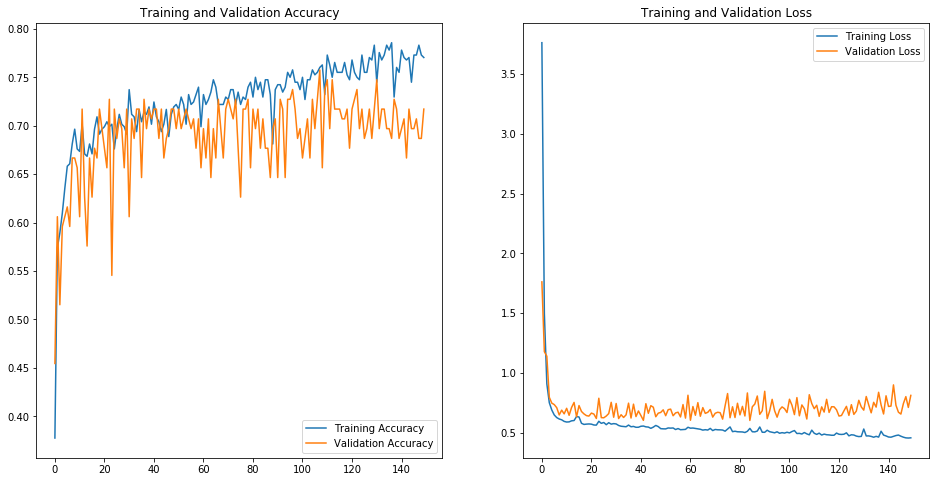

In [166]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()